In [1]:
import math
total_steps = 12
visited = [[False for i in range(total_steps * 2 + 1)] for i in range(total_steps
* 2 + 1)]
start = [total_steps,total_steps]
SAW_count = [0 for i in range(total_steps + 1)]
dir = [[-1,0],[0,-1],[0,1],[1,0]]
def add(pos,d):
 return [pos[0] + d[0],pos[1] + d[1]]
def do_SAW(n,curr_dir,pos):
 if visited[pos[0]][pos[1]]:
  return
 if n == total_steps:
  SAW_count[n] += 1
  return
  visited[pos[0]][pos[1]] = True
  SAW_count[n] += 1


 for i in range(4):
  if i == 3 - curr_dir:
   continue
  do_SAW(n + 1,i,add(pos,dir[i]))
 visited[pos[0]][pos[1]] = False
def show_Pn():
    do_SAW(0,-1,start)
    for i in range(len(SAW_count)):
        print("step : ",i,"Cn : ",SAW_count[i],"Pn : ",SAW_count[i] / 3 ** i)
show_Pn()

step :  0 Cn :  0 Pn :  0.0
step :  1 Cn :  0 Pn :  0.0
step :  2 Cn :  0 Pn :  0.0
step :  3 Cn :  0 Pn :  0.0
step :  4 Cn :  0 Pn :  0.0
step :  5 Cn :  0 Pn :  0.0
step :  6 Cn :  0 Pn :  0.0
step :  7 Cn :  0 Pn :  0.0
step :  8 Cn :  0 Pn :  0.0
step :  9 Cn :  0 Pn :  0.0
step :  10 Cn :  0 Pn :  0.0
step :  11 Cn :  0 Pn :  0.0
step :  12 Cn :  708588 Pn :  1.3333333333333333


0.9095205664243439
0.7140275253639562
[0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142]


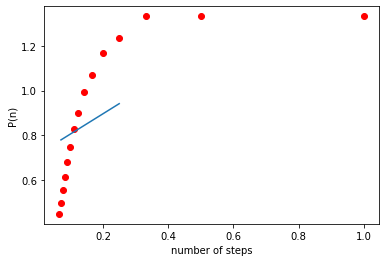

In [47]:
import math
import matplotlib.pyplot as plt
import numpy as np
total_steps = 15
visited = [[False for i in range(total_steps * 2 + 1)] for i in range(total_steps
* 2 + 1)]
start = [total_steps,total_steps]

SAW_count = [0 for i in range(total_steps + 1)]
dir = [[-1,0],[0,-1],[0,1],[1,0]]
def add(pos,d):
    return [pos[0] + d[0],pos[1] + d[1]]
def do_SAW(n,curr_dir,pos):
    if visited[pos[0]][pos[1]]:
        return
    if n == total_steps:
        SAW_count[n] += 1
        return
    visited[pos[0]][pos[1]] = True
    SAW_count[n] += 1
    for i in range(4):
        if i == 3 - curr_dir:
            continue
        do_SAW(n + 1,i,add(pos,dir[i]))
    visited[pos[0]][pos[1]] = False
    
    
def linear_regress(x,y):
 a,b = 0,0
 a00,a01,a10,a11,b0,b1 = len(x),0,0,0,0,0
 for i in range(len(x)):
  a01 += x[i]
  a11 += x[i] ** 2
  b0 += y[i]
  b1 += y[i] * x[i]
 a10 = a01


 deta = a00 * a11 - a01 * a10
 b = (b0 * a11 - b1 * a01) / deta
 a = (a00 * b1 - a10 * b0) / deta
 return a,b


def draw_line(a,b,start,end):
 x = [1/i for i in np.arange(start,end)]
 y = [a * 1/i + b for i in range(start,end)]
 plt.plot(x,y)
 print(a)
 print(b)
 print(x)
def show_Pn():
 do_SAW(0,-1,start)
 x = [1/i for i in range(1,len(SAW_count))]
 y = [SAW_count[i] / 3 ** i for i in range(1,len(SAW_count))]
 plt.xlabel('number of steps')
 plt.ylabel('P(n)')
 plt.scatter(x,y,color='red')
 a,b = linear_regress(x,y)
 draw_line(a,b,4,len(x))
 plt.show()
show_Pn()

In [43]:
import vpython as vpy
import math
scene = vpy.canvas()
c = vpy.curve()
def add(v1,v2):
 return [v1[0] + v2[0],v1[1] + v2[1]]
def div(v1,f):
 return [v1[0] / f,v1[1] / f]

def sub(v1,v2):
 return [v1[0] - v2[0],v1[1] - v2[1]]
def rotate(v,angle):
 ca = math.cos(angle)
 sa = math.sin(angle)
 return [v[0] * ca - v[1] * sa,\
v[0] * sa + v[1] * ca]
def Knoc(start,end,depth):
 if depth == 0:
  p1 = vpy.vector(start[0],start[1],0)
  p2 = vpy.vector(end[0],end[1],0)
  c.append(pos = p1)
  c.append(pos = p2)
  return
 dis = div(sub(end,start),3)
 p1 = add(start,dis)
 p2 = add(p1,rotate(dis,math.pi / 3.))
 p3 = sub(end,dis)
 Knoc(start,p1,depth - 1)
 Knoc(p1,p2,depth - 1)
 Knoc(p2,p3,depth - 1)
 Knoc(p3,end,depth - 1)
def draw(shape,depth,core):
 for i in range(0,len(shape) - 1):
  Knoc(shape[i],shape[i + 1],depth)
 Knoc(shape[len(shape) - 1],shape[0],depth)
sqrt3 = math.sqrt(3)
triangle = [[-1.,0.],[0.,sqrt3],[1.,0.]]
rectangle=[[-1,0],[-1,2],[1,2],[1,0]]
draw(rectangle,4,rectangle)


<IPython.core.display.Javascript object>